In [ ]:
pip install  matplotlib seaborn scipy pandas scikit-learn

k=1: Accuracy=1.0000, F1-Score=1.0000
k=3: Accuracy=1.0000, F1-Score=1.0000
k=5: Accuracy=1.0000, F1-Score=1.0000
Weighted k-NN (k=3): Accuracy=1.0000, F1-Score=1.0000


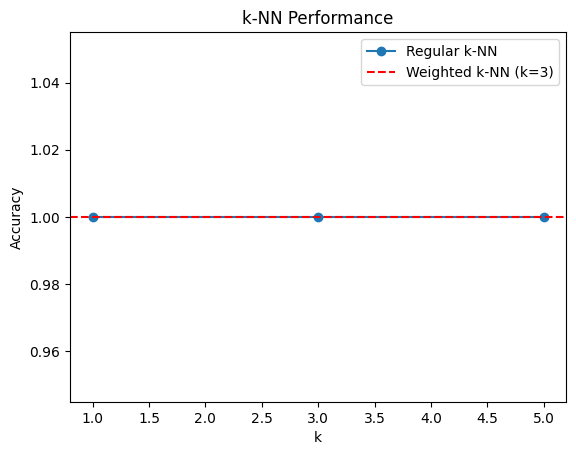

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regular k-NN
k_values = [1, 3, 5]
results = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append((k, acc, f1))
    print(f"k={k}: Accuracy={acc:.4f}, F1-Score={f1:.4f}")

# Weighted k-NN
knn_weighted = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_weighted.fit(X_train, y_train)
y_pred_weighted = knn_weighted.predict(X_test)
acc_weighted = accuracy_score(y_test, y_pred_weighted)
f1_weighted = f1_score(y_test, y_pred_weighted, average='weighted')
print(f"Weighted k-NN (k=3): Accuracy={acc_weighted:.4f}, F1-Score={f1_weighted:.4f}")

# Plot accuracy
plt.plot(k_values, [r[1] for r in results], marker='o', label='Regular k-NN')
plt.axhline(acc_weighted, color='r', linestyle='--', label='Weighted k-NN (k=3)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Performance')
plt.legend()
plt.show()